## ***MODELOS***
El dataset utilizado no contiene una gran cantidad de datos ya que se realizar sobre un conjunto pequeño, la zona de Churriana Málaga. No obstante, aprovecharemos la baja cantidad de caracteristicas recopiladas para graficar su relación con la variable a predecir, en este caso el precio; y la relacion entre las mismas. Antes de optar por escoger un algoritmo de regresión, la mejor opcion es dar un vistaso al dataset y analizar el comportamiento de las variables.

realizamos diferentes modelos para ver cual de ellos presenta el mejor comportamiento a la hora de predecir el precio:
* Linear Regressor
* Random Forest Regressor
* SVM-Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score





In [6]:
data = pd.read_csv('data/clean_properties_churriana.csv', index_col = 0)

In [7]:
data.head()

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,Chalet adosado en venta en Guadalmar,"Churriana, Málaga",36.666638,-4.464576,395000,inProcess,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.663719,-4.503897,640000,inProcess,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,Casa o chalet independiente en venta en calle ...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.656894,-4.502930,567000,inProcess,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,"Ático en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,375900,unknown,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,"Piso en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,249900,unknown,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


#### **DATA ENGINEER**
Trasformamos las variables categóricas a numéricas. Usamos LAbelEncoder para ello asignando un valor único para cada valor categórico en cada una delas variables.



In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.localizacion= le.fit_transform(data.localizacion.values)
data.titulo= le.fit_transform(data.titulo.values)
data.energy_certification= le.fit_transform(data.energy_certification.values)

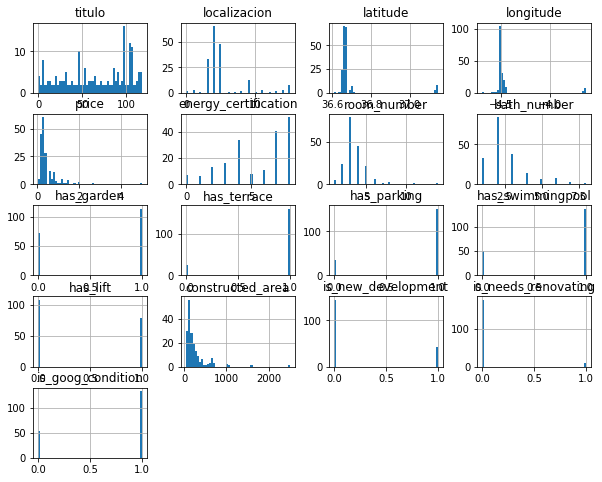

In [9]:
data.hist(bins=50, figsize=(10, 8))
plt.show()

Columnas de entrada y salida

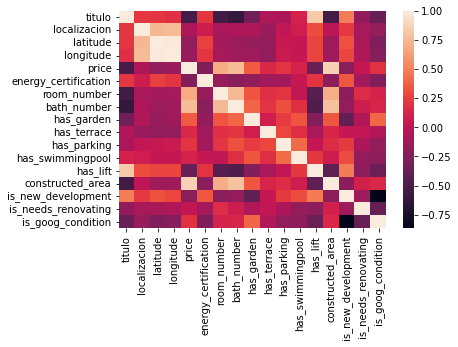

In [10]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Las columna de: Título, latitud, longitud, energy certification, has lift, is new development no influyen en nuestra salida de datos para la variable precio.

In [11]:
#### ***Definimos los datos de entrada y de salida.***

In [12]:
target = data['price']
features = data.drop("price",axis=1)



In [13]:
#### **División de datos en Train y Test**

In [14]:
Conjunto de entrenamiento y prueba

SyntaxError: invalid syntax (<ipython-input-14-5cc9ef2bef98>, line 1)

In [20]:
features_train, features_test, target_train, target_test = train_test_split(features, target)
features_train.shape

(140, 16)

In [21]:
#puesto para que nos sirva para el modelo de regresión lineal.
#referencia: https://www.kaggle.com/code/laeclover/predicci-n-de-venta-de-casa
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

In [22]:
## ***Linear Regressor***

In [23]:
#Creamos una instancia para el modelo de regresion lineal
lr = LinearRegression()

In [24]:
Entrenamos el modelo

SyntaxError: invalid syntax (<ipython-input-24-d2421775f3e4>, line 1)

In [25]:
lr.fit(features_train, target_train)

LinearRegression()

In [26]:
target_pred= lr.predict(features_test)

In [27]:
features_test.shape

(47, 16)

In [28]:
target_pred.shape

(47,)

In [29]:
target_pred

array([ 990330.29022944,  291342.03826627,  455397.87103376,
         58273.05405129,  323152.74989158,  312650.59748521,
        498038.29240869,  322267.97200173,  272040.91849437,
        535941.27049601,  275587.691728  ,  606319.43203387,
       1002414.36369489,  729479.25827491,  874845.56016006,
        608638.00093098,  -50003.39904119,  291107.11151287,
        143936.67353141,  277590.73060505,  269953.69923958,
        188107.42294444,  448426.52079582,  767797.07680206,
        293828.85640866,  176410.3753181 ,  341144.0346508 ,
        506553.96910475,  726428.33207585,  664565.1716086 ,
        258056.21065833, 1279457.08749521, 1615110.40522176,
        -79792.56038906,  246811.56029546,  217845.76804642,
        485937.0276809 ,  262916.18700927,  307761.20830226,
        262109.43602742,  989962.1781978 ,  263722.93799113,
        587569.26151951, 1253869.2413639 , 1914828.71852693,
        371229.73165195,  672840.43652532])

In [30]:
features_test.head()

,titulo,localizacion,latitude,longitude,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
128,32,5,36.661271,-4.505055,5,5,4,1.0,0.0,0.0,0.0,0.0,650,0,0,1
23,91,11,36.696712,-4.449963,2,3,2,0.0,1.0,1.0,1.0,1.0,101,1,0,0
184,37,4,36.664690,-4.519482,8,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
61,90,14,37.131125,-3.672363,7,1,1,0.0,0.0,1.0,0.0,1.0,53,0,0,1
109,53,4,36.667494,-4.498079,7,4,2,0.0,0.0,1.0,1.0,0.0,231,0,0,1


In [31]:
mae = mean_absolute_error(target_test, target_pred)

In [32]:
mae

169270.3925949779

In [33]:
mse = mean_squared_error(target_test, target_pred)
r2 = r2_score(target_test, target_pred)
r2

0.6076853336894488

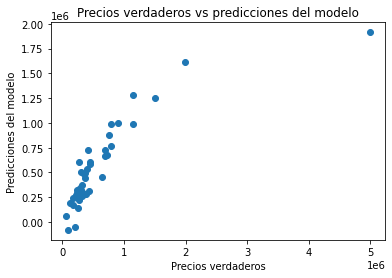

In [34]:
plt.scatter(target_test, target_pred)
plt.xlabel("Precios verdaderos")
plt.ylabel("Predicciones del modelo")
plt.title("Precios verdaderos vs predicciones del modelo")
plt.show()

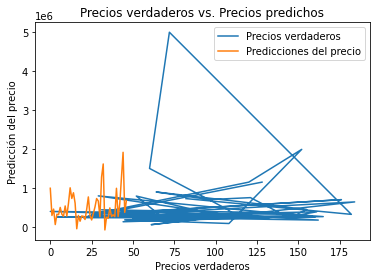

In [35]:
plt.plot(target_test, label='Precios verdaderos')
plt.plot(target_pred, label='Predicciones del precio')
plt.xlabel('Precios verdaderos')
plt.ylabel('Predicción del precio')
plt.title('Precios verdaderos vs. Precios predichos')
plt.legend()
plt.show()

In [37]:
import seaborn as sns

/home/dsc/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


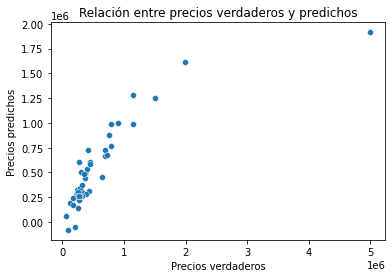

In [38]:
sns.scatterplot(target_test, target_pred)
plt.xlabel('Precios verdaderos')
plt.ylabel('Precios predichos')
plt.title('Relación entre precios verdaderos y predichos')

plt.show()

In [39]:
Realización de una enumeración para comparar para cada vivienda los precios reales con los predichos.

SyntaxError: invalid syntax (<ipython-input-39-2333aae1a083>, line 1)

In [40]:
for i, (target_test, target_pred) in enumerate(zip(target_test, target_pred)):
    print(f'Vivienda {i}: Precio verdadero = {target_test}, Precio predicho = {target_pred}')

Vivienda 0: Precio verdadero = 1148000, Precio predicho = 990330.2902294397
Vivienda 1: Precio verdadero = 273100, Precio predicho = 291342.03826627135
Vivienda 2: Precio verdadero = 640000, Precio predicho = 455397.8710337579
Vivienda 3: Precio verdadero = 54900, Precio predicho = 58273.05405129492
Vivienda 4: Precio verdadero = 298000, Precio predicho = 323152.74989157915
Vivienda 5: Precio verdadero = 436700, Precio predicho = 312650.5974852145
Vivienda 6: Precio verdadero = 362000, Precio predicho = 498038.29240868986
Vivienda 7: Precio verdadero = 235000, Precio predicho = 322267.9720017314
Vivienda 8: Precio verdadero = 225000, Precio predicho = 272040.91849437356
Vivienda 9: Precio verdadero = 395000, Precio predicho = 535941.2704960108
Vivienda 10: Precio verdadero = 318000, Precio predicho = 275587.6917279959
Vivienda 11: Precio verdadero = 445000, Precio predicho = 606319.4320338666
Vivienda 12: Precio verdadero = 895000, Precio predicho = 1002414.3636948913
Vivienda 13: Prec

In [41]:
target_pred1= lr.predict(features)

In [42]:
data['Price_predict'] = target_pred1

In [43]:
data.head()

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict
0,49,3,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1,535941.270496
1,35,4,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,486980.571591
2,29,5,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1,790011.045948
3,114,4,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0,336931.992823
4,97,4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0,307761.208302


In [44]:
data['Var_Prices'] = data['Price_predict'] - data['price'] 

In [49]:
data['%_rentabilidad'] = (data['Var_Prices']/data['price'])*100

In [50]:
Todos los datos en negativo son viviendas en las que su precio actual por las que están a la venta está por debajo del precio predicho por lo cual son una oportunidad de inversión 

SyntaxError: invalid syntax (<ipython-input-50-21b3b15d3c7a>, line 1)

In [51]:
data

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict,Var_Prices,%_rentabilidad
0,49,3,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1,535941.270496,140941.270496,35.681334
1,35,4,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,486980.571591,-153019.428409,-23.909286
2,29,5,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1,790011.045948,223011.045948,39.331754
3,114,4,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0,336931.992823,-38968.007177,-10.366589
4,97,4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0,307761.208302,57861.208302,23.153745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,66,4,36.669872,-4.519457,320000,1,3,3,1.0,1.0,1.0,1.0,0.0,140,0,0,1,371229.731652,51229.731652,16.009291
183,62,5,36.661758,-4.504469,595000,4,4,3,1.0,1.0,1.0,0.0,0.0,226,0,0,1,545833.575662,-49166.424338,-8.263265
184,37,4,36.664690,-4.519482,640000,8,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,455397.871034,-184602.128966,-28.844083
185,82,4,36.661137,-4.519971,367500,7,3,2,1.0,1.0,1.0,1.0,0.0,123,0,0,1,241003.065481,-126496.934519,-34.420935


In [52]:
data.to_csv('datos_finales.csv', index=False)

https://www.kaggle.com/code/laeclover/predicci-n-de-venta-de-casa

In [11]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

#### **Preprocesamiento de los datos**
Antes de ingresar los datos a un modelo, estos deben ser acondicionados para que las predicciones sean las mas acertadas posibles. Para ello se utilizan técnicas como transformaciones, agrupamiento o normalización. Pero antes de realizar el preprocesamiento tengamos una idea de cual sería el resultado de ingresar los datos sin acondicionar a una regresión múltiple.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def regresion_lineal(data,test_size=0.2,Prec_var='price'):
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)
    lr = LinearRegression()
    lr.fit(x_train,y_train)

    r2_train = lr.score(x_train,y_train)
    r2_test = lr.score(x_test,y_test)
    
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)
    
    MAE_train = error_absoluto_medio(y_train,y_pred_train)
    
    MAE_test = error_absoluto_medio(y_test,y_test_pred)
    
    return r2_train,r2_test,MAE_train,MAE_test

r2_train,r2_test,MAE_train,MAE_test = regresion_lineal(data)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126


#### **Escalación de los datos**

In [13]:
from sklearn.preprocessing import MinMaxScaler
aux1 =  data.drop('price',axis=1)
col_esc = aux1.columns.values

scale = MinMaxScaler()

data2 = data
data2[col_esc] = scale.fit_transform(data[col_esc])

In [14]:
data2.head()

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,0.415254,0.200000,0.104634,0.212265,395000,0.875,0.230769,0.285714,1.0,1.0,1.0,1.0,0.0,0.058776,0.0,0.0,1.0
1,0.296610,0.266667,0.099171,0.174626,640000,0.875,0.230769,0.142857,1.0,1.0,1.0,1.0,0.0,0.106122,0.0,0.0,1.0
2,0.245763,0.333333,0.086396,0.175551,567000,0.875,0.307692,0.428571,1.0,1.0,0.0,1.0,0.0,0.146939,0.0,0.0,1.0
3,0.966102,0.266667,0.113152,0.162179,375900,1.000,0.230769,0.142857,1.0,1.0,1.0,1.0,1.0,0.075918,1.0,0.0,0.0
4,0.822034,0.266667,0.113152,0.162179,249900,1.000,0.076923,0.142857,0.0,1.0,1.0,1.0,1.0,0.040816,1.0,0.0,0.0


In [15]:
data.describe()

,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
count,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.555289,0.354011,0.152275,0.226678,4.829937e+05,0.679813,0.201974,0.222307,0.609626,0.860963,0.812834,0.73262,0.422460,0.078952,0.229947,0.053476,0.716578
std,0.304381,0.211385,0.211999,0.193632,5.127819e+05,0.301770,0.125336,0.199341,0.489144,0.346914,0.391092,0.44378,0.495277,0.110337,0.421928,0.225585,0.451870
min,0.000000,0.000000,0.000000,0.000000,5.490000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292373,0.266667,0.091272,0.171782,2.499000e+05,0.500000,0.153846,0.142857,0.000000,1.000000,1.000000,0.00000,0.000000,0.023878,0.000000,0.000000,0.000000
50%,0.576271,0.266667,0.099349,0.176613,2.999900e+05,0.750000,0.153846,0.142857,1.000000,1.000000,1.000000,1.00000,0.000000,0.041633,0.000000,0.000000,1.000000
75%,0.830508,0.333333,0.113012,0.187782,5.670000e+05,1.000000,0.230769,0.285714,1.000000,1.000000,1.000000,1.00000,1.000000,0.084082,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
r2_train,r2_test,MAE_train,MAE_test = regresion_lineal(data2)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Datos Escalados',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126
1,Regresión Lineal,Datos Escalados,0.778667,0.903712,129022.420815,92139.865487


### **Selección del modelo de regresión**<br>
Al usar la regresion lineal obtenemos un porcentaje de precisión del 76%. Este resultado no está mal pero dado que el dataset posee varias características que no presentan una relación lineal con el precio, probaremos con modelos más flexibles.
<br><br>
#### **Regresión polinómica**

In [17]:
from sklearn.preprocessing import PolynomialFeatures

def regresion_poli(data,degree=2,test_size=0.2,Prec_var='price'):
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    
    poly = PolynomialFeatures(degree=2,)
    x_poly = poly.fit_transform(x)
    
    x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=test_size)
        
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    r2_train = lr.score(x_train,y_train)
    r2_test = lr.score(x_test,y_test)
    
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    

    return r2_train,r2_test,MAE_train,MAE_test

In [18]:
r2_train,r2_test,MAE_train,MAE_test = regresion_poli(data2,degree=3)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Polinómica','Sin procesar / Grado 3',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126
1,Regresión Lineal,Datos Escalados,0.778667,0.903712,129022.420815,92139.865487
2,Regresión Polinómica,Sin procesar / Grado 3,0.999052,-4.656410,11576.254973,427432.399992


In [19]:
regresion_poli(data2)
r2_train,r2_test,MAE_train,MAE_test = regresion_poli(data2,degree=3)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Polinómica','Datos Escalados / Grado 3',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126
1,Regresión Lineal,Datos Escalados,0.778667,0.903712,129022.420815,92139.865487
2,Regresión Polinómica,Sin procesar / Grado 3,0.999052,-4.656410,11576.254973,427432.399992
3,Regresión Polinómica,Sin procesar / Grado 3,0.993723,-0.591277,17081.224928,554276.704372


### **Random Forest Regressor**

In [20]:
from sklearn.tree import DecisionTreeRegressor

def Arbol_Regresion(data,test_size=0.2,Prec_var='price'):
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)
    
    tree = DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)
    tree.fit(x_train,y_train)
    
    r2_train = tree.score(x_train,y_train)
    r2_test = tree.score(x_test,y_test)
    
    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    
    return r2_train,r2_test, MAE_train,MAE_test

In [21]:
r2_train,r2_tes, MAE_train,MAE_test = Arbol_Regresion(data)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126
1,Regresión Lineal,Datos Escalados,0.778667,0.903712,129022.420815,92139.865487
2,Regresión Polinómica,Sin procesar / Grado 3,0.999052,-4.656410,11576.254973,427432.399992
3,Regresión Polinómica,Sin procesar / Grado 3,0.993723,-0.591277,17081.224928,554276.704372
4,Árbol de regresión,Sin procesar,0.791610,-0.591277,89251.779588,186624.710518


In [22]:
Arbol_Regresion(data2)
r2_train,r2_tes, MAE_train,MAE_test = Arbol_Regresion(data2)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Datos Escalados',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126
1,Regresión Lineal,Datos Escalados,0.778667,0.903712,129022.420815,92139.865487
2,Regresión Polinómica,Sin procesar / Grado 3,0.999052,-4.656410,11576.254973,427432.399992
3,Regresión Polinómica,Sin procesar / Grado 3,0.993723,-0.591277,17081.224928,554276.704372
4,Árbol de regresión,Sin procesar,0.791610,-0.591277,89251.779588,186624.710518
5,Árbol de regresión,Sin procesar,0.586993,-0.591277,113927.327083,104981.306224


#### **Redes neuronales - Regresión**


**Compilación del modelo**

In [27]:
import tensorflow as tf
from tensorflow.keras import regularizers

def get_model_compile():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32,activation='tanh',input_shape=(16,)),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)   
    ])

    optimizer=tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse'])
    return model

División del dataset y entrenamiento del modelo¶


In [28]:
x = data2.drop('price',axis=1)
y = data2['price']

batch_size = 25 #numero de muestra sobre el que se va a entrenar antes de aplicar el modelo al resto de datos
epochs= 10 #numero de veces del bucle de entrenamiento de mi modelo

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



In [29]:
model = get_model_compile()

In [30]:
history = model.fit(x_train,y_train,
                    epochs=epochs,batch_size=batch_size,
                    validation_data=(x_test,y_test),
                    shuffle=True,
                    verbose=0)

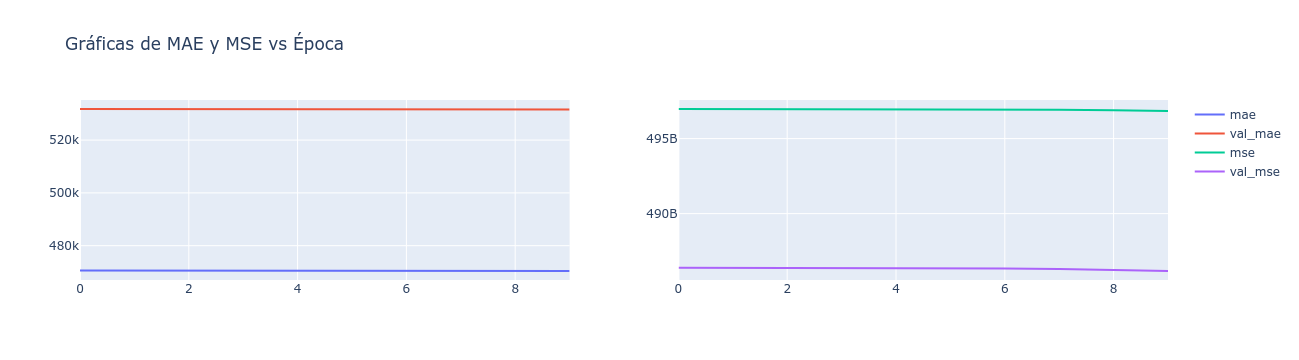

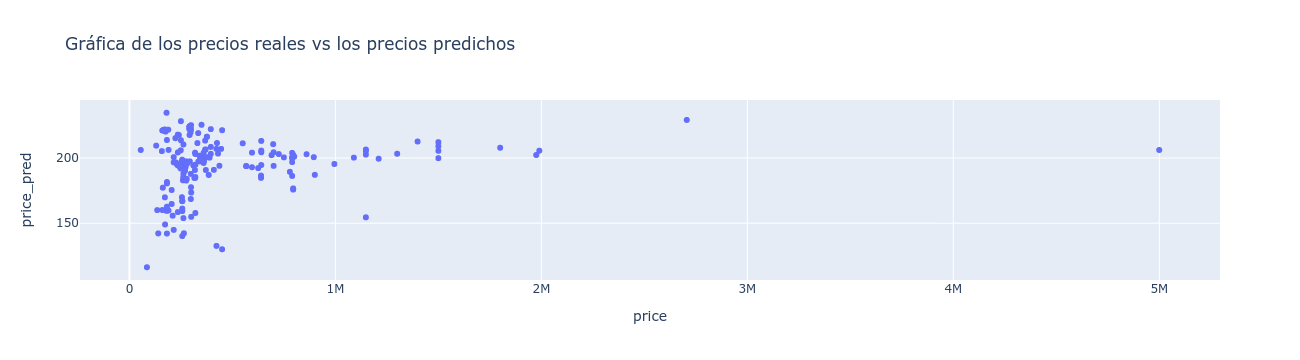

In [32]:
evol_train = pd.DataFrame(history.history)
evol_train['epoch'] = history.epoch

trace1 = go.Scatter(x=evol_train['epoch'], y=evol_train['mae'], mode='lines',name='mae')
trace2 = go.Scatter(x=evol_train['epoch'], y=evol_train['val_mae'], mode='lines',name='val_mae')

trace3 = go.Scatter(x=evol_train['epoch'], y=evol_train['mse'], mode='lines',name='mse')
trace4 = go.Scatter(x=evol_train['epoch'], y=evol_train['val_mse'], mode='lines',name='val_mse')

fig = make_subplots(rows=1,cols=2)
fig.add_trace(trace1,row=1,col=1)
fig.add_trace(trace2,row=1,col=1)

fig.add_trace(trace3,row=1,col=2)
fig.add_trace(trace4,row=1,col=2)

fig.update_layout(title_text="Gráficas de MAE y MSE vs Época")
fig.show()

data2['price_pred'] = model.predict(x)
px.scatter(data2,x='price',y='price_pred',title='Gráfica de los precios reales vs los precios predichos ')

In [33]:
from sklearn.metrics import r2_score
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

MAE_TRAIN,MAE_TEST = error_gen(y_train,y_pred_train[:,0],y_test,y_pred_test[:,0])

final = resultados.shape[0]
resultados.loc[final] = ['ANN','Datos Escalados',r2_train,r2_test,MAE_TRAIN,MAE_TEST]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.905204,0.613774,86970.591973,198583.448126
1,Regresión Lineal,Datos Escalados,0.778667,0.903712,129022.420815,92139.865487
2,Regresión Polinómica,Sin procesar / Grado 3,0.999052,-4.656410,11576.254973,427432.399992
3,Regresión Polinómica,Sin procesar / Grado 3,0.993723,-0.591277,17081.224928,554276.704372
4,Árbol de regresión,Sin procesar,0.791610,-0.591277,89251.779588,186624.710518
5,Árbol de regresión,Sin procesar,0.586993,-0.591277,113927.327083,104981.306224
6,ANN,Datos Escalados,-0.802863,-1.387900,470357.014703,531580.564937


<p> Hace falta incluir en el dataset la columna precio predicho y crear una columna con la diferencia del precio real y el predicho. </p>
<p> Crear un dataset adicional solo con aquellas viviendas en las que el precio predicho haya sido superior al real. Esta será la que usaremos para la visualización de los datos. Le mostraremos al usuario la coluna precio actual, la columna precio predicho y la columna rentabilidad (esta con la diferencia entre lo real y el predicho)</p>